![](https://hipsters.jobs/files/pictures/Logo_AlurabyCaelum.png)

### #QUARENTENADADOS

### https://www.alura.com.br/quarentenadados/aula01-sua-primeira-analise-de-dados?utm_campaign=alura_quarentenadados_-_1_aula&utm_medium=email&utm_source=RD+Station

### Este primeiro trabalho consiste em ler dados do MovieLens e fazer algumas análises nas avaliações dos filmes

O MovieLens é uma comunidade virtual que recomenda filmes para que seus usuários assistam, com base em suas preferências de filmes usando filtragem colaborativa de classificação dos filmes dos membros e críticas de filmes.

https://movielens.org/

![](https://www.saashub.com/images/app/service_logos/8/f181cf663f5c/large.png)

![](https://media.tenor.com/images/74cbf1b0e57f0c8aa40927ec0da57063/tenor.gif)

### Importando as bibliotecas a serem usadas

A primeira coisa a ser feita é a importação das biliotecas. Mesmo que sejam usadas mais adiante, é bom que este processo seja feito logo no início, de modo a manter a estrutura do notebook orgnaizada.

![](https://thumbs.gfycat.com/IdleCostlyBaiji-size_restricted.gif)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

### Importando a base de dados do MovieLens

Aqui nós iremos importar a nossa base de dados.
Além disso, alteraremos os nomes da coluna, tornando a identificação mais intuitiva.

In [2]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")

In [3]:
filmes.columns = ["filmeId", "titulos", "generos"]

In [4]:
filmes.head()

filmeId                             titulos  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                       generos  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

### Importando a base de dados das avaliações dos filmes

In [5]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")

In [6]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [7]:
avaliacoes.head()

usuarioId  filmeId  nota    momento
0          1        1   4.0  964982703
1          1        3   4.0  964981247
2          1        6   4.0  964982224
3          1       47   5.0  964983815
4          1       50   5.0  964982931


### Alguns testes que podemos fazer na base de dados baixada

Abaixo mostramos algumas coisas que podem ser feitas com a nossa base de dados. Estas manipulações ajudam a analisar as informações que estamos tratando, como identificar médias, verificar número de linhas e valores máximo e mínimo, dentre outros.

In [8]:
#Tamanho da base (número de linhas)

len(avaliacoes)

100836

In [9]:
#Lendo a documentação do objeti (docstring)

?avaliacoes

In [10]:
#Número de linhas e número de colunas (features)

avaliacoes.shape 

(100836, 4)

In [11]:
#Nomes das colunas

avaliacoes.columns 

Index(['usuarioId', 'filmeId', 'nota', 'momento'], dtype='object')

In [12]:
#Descrição da base de dados "avaliacoes"

avaliacoes.describe() 

usuarioId        filmeId           nota       momento
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09

In [13]:
#Filtrar as linhas cujos valores de "filmeId" sejam iguais a 1

avaliacoes.query("filmeId==1").head(5)

usuarioId  filmeId  nota     momento
0             1        1   4.0   964982703
516           5        1   4.0   847434962
874           7        1   4.5  1106635946
1434         15        1   2.5  1510577970
1667         17        1   4.5  1305696483

### Filmes agrupados por notas

In [14]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()

In [15]:
notas_medias_por_filme.head(5)

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

### Unindo informações dos dois repositórios que carregamos

Aqui nós iremos inserir a coluna de "notas" à tabela "filmes" através do join, tendo como coluna comum "filmeId"

In [16]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")

In [17]:
filmes_com_media.head()

filmeId                             titulos  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                       generos      nota  
0  Adventure|Animation|Children|Comedy|Fantasy  3.920930  
1                   Adventure|Children|Fantasy  3.431818  
2                               Comedy|Romance  3.259615  
3                         Comedy|Drama|Romance  2.357143  
4                                       Comedy  3.071429

In [18]:
#Ordenando os filmes pelo maior valor da nota

filmes_com_media.sort_values("nota", ascending=False).head(15)

filmeId                                            titulos  \
7656    88448              Paper Birds (Pájaros de papel) (2010)   
8107   100556                         Act of Killing, The (2012)   
9083   143031                                    Jump In! (2007)   
9094   143511                                       Human (2015)   
9096   143559                                L.A. Slasher (2015)   
4251     6201                                   Lady Jane (1986)   
8154   102217                     Bill Hicks: Revelations (1993)   
8148   102084                       Justice League: Doom (2012)    
4246     6192          Open Hearts (Elsker dig for evigt) (2002)   
9122   145994                             Formula of Love (1984)   
8115   100906                                Maniac Cop 2 (1990)   
9129   146662             Dragons: Gift of the Night Fury (2011)   
8074    99636                            English Vinglish (2012)   
5785    31522  Marriage of Maria Braun, The (Ehe der Maria Br...   
9131   146684                      Cosmic Scrat-tastrophe (2015)   

                         generos  nota  
7656                Comedy|Drama   5.0  
8107                 Documentary   5.0  
9083        Comedy|Drama|Romance   5.0  
9094                 Documentary   5.0  
9096        Comedy|Crime|Fantasy   5.0  
4251               Drama|Romance   5.0  
8154                      Comedy   5.0  
8148    Action|Animation|Fantasy   5.0  
4246                     Romance   5.0  
9122                      Comedy   5.0  
8115      Action|Horror|Thriller   5.0  
9129  Adventure|Animation|Comedy   5.0  
8074                Comedy|Drama   5.0  
5785                       Drama   5.0  
9131   Animation|Children|Comedy   5.0

### Alguns gráficos

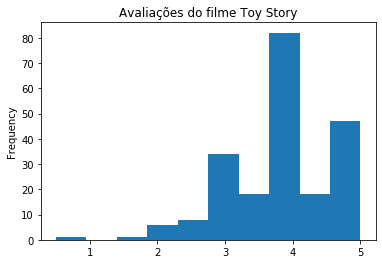

In [19]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

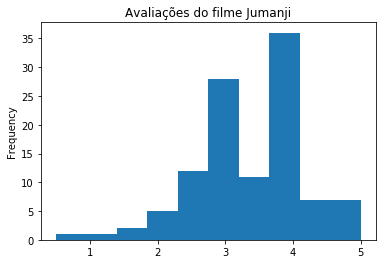

In [20]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist')
plt.title("Avaliações do filme Jumanji")
plt.show()

### Desafio 1 do Paulo Silveira
O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.

In [21]:
filmes_com_media.sort_values("nota", ascending=False)

filmeId                                titulos                generos  \
7656    88448  Paper Birds (Pájaros de papel) (2010)           Comedy|Drama   
8107   100556             Act of Killing, The (2012)            Documentary   
9083   143031                        Jump In! (2007)   Comedy|Drama|Romance   
9094   143511                           Human (2015)            Documentary   
9096   143559                    L.A. Slasher (2015)   Comedy|Crime|Fantasy   
...       ...                                    ...                    ...   
5749    30892     In the Realms of the Unreal (2004)  Animation|Documentary   
5824    32160               Twentieth Century (1934)                 Comedy   
5837    32371              Call Northside 777 (1948)  Crime|Drama|Film-Noir   
5957    34482           Browning Version, The (1951)                  Drama   
7565    85565                     Chalet Girl (2011)         Comedy|Romance   

      nota  
7656   5.0  
8107   5.0  
9083   5.0  
9094   5.0  
9096   5.0  
...    ...  
5749   NaN  
5824   NaN  
5837   NaN  
5957   NaN  
7565   NaN  

[9742 rows x 4 columns]

In [22]:
filmes_com_media["nota"].isnull().sum()

18

In [23]:
print(filmes_sem_avaliacao)

NameError: name 'filmes_sem_avaliacao' is not defined

### Desafio 2 do Guilherme Silveira

Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.


In [24]:
filmes_com_media = filmes_com_media.rename(columns={'nota':'notas'})

In [25]:
filmes_com_media.head(5)

filmeId                             titulos  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                       generos     notas  
0  Adventure|Animation|Children|Comedy|Fantasy  3.920930  
1                   Adventure|Children|Fantasy  3.431818  
2                               Comedy|Romance  3.259615  
3                         Comedy|Drama|Romance  2.357143  
4                                       Comedy  3.071429

### Desafio 3 do Guilherme Silveira

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.



In [26]:
avaliacoes.groupby("filmeId")

### Desafio 4 do Thiago Gonçalves

Arredondar as médias (coluna de nota média) para duas casas decimais.



In [27]:
filmes_com_media['notas'] = filmes_com_media.notas.round(2)

In [28]:
filmes_com_media.head(5)

filmeId                             titulos  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                       generos  notas  
0  Adventure|Animation|Children|Comedy|Fantasy   3.92  
1                   Adventure|Children|Fantasy   3.43  
2                               Comedy|Romance   3.26  
3                         Comedy|Drama|Romance   2.36  
4                                       Comedy   3.07

### Desafio 5 do Allan Spadini

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)



In [29]:
#Coluna de gêneros (não tratada)

generos_filmes_brutos = filmes_com_media['generos'].unique()

In [30]:
#Coluna de gênero armazenada em uma lista (com elementos repetidos, mas sem divisão entre si)

generos_filmes_todos = []

for i in range(len(generos_filmes_brutos)):
    generos_filmes_todos.append(generos_filmes_brutos[i].split("|"))

In [31]:
#Eliminando as listas internas presentes em generos_filmes_todos, tornando em uma lista só

generos_filmes = []

for i in range(len(generos_filmes_todos)):
    if i==0:
        generos_filmes = generos_filmes_todos[i]
    else:
        generos_filmes += generos_filmes_todos[i]

In [32]:
#Eliminando os gêneros repetidos

generos_unicos_filmes = list(set(generos_filmes))

In [33]:
generos_unicos_filmes

['Crime',
 'Horror',
 'Thriller',
 'IMAX',
 'Western',
 'Sci-Fi',
 'Film-Noir',
 'Mystery',
 'Action',
 'War',
 '(no genres listed)',
 'Drama',
 'Romance',
 'Musical',
 'Comedy',
 'Children',
 'Adventure',
 'Animation',
 'Fantasy',
 'Documentary']

In [34]:
#Quantidade de gêneros presentes na lista

len(generos_unicos_filmes)

20

### Desafio 6 da Thais André

Contar o número de aparições de cada genero.



In [35]:
generos = []
aparicoes = []

for i in generos_unicos_filmes:
    print(i + " - " + str(generos_filmes.count(i)))
    generos.append(i)
    aparicoes.append(generos_filmes.count(i))

Crime - 181
Horror - 153
Thriller - 274
IMAX - 91
Western - 64
Sci-Fi - 236
Film-Noir - 30
Mystery - 166
Action - 341
War - 75
(no genres listed) - 1
Drama - 349
Romance - 200
Musical - 96
Comedy - 341
Children - 174
Adventure - 310
Animation - 200
Fantasy - 264
Documentary - 30


### Desafio 7 do Guilherme Silveira

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

In [36]:
#Criando o dataframe com as colunas generos e aparicoes (ainda vazias)

df_generos_filmes = pd.DataFrame(columns=['generos', 'aparicoes'])

In [38]:
#Preenchendo a coluna generos com a list generos

df_generos_filmes['generos'] = generos

In [39]:
#Preenchendo a coluna aparicoes com a list aparicoes

df_generos_filmes['aparicoes'] = aparicoes

In [40]:
df_generos_filmes

generos  aparicoes
0                Crime        181
1               Horror        153
2             Thriller        274
3                 IMAX         91
4              Western         64
5               Sci-Fi        236
6            Film-Noir         30
7              Mystery        166
8               Action        341
9                  War         75
10  (no genres listed)          1
11               Drama        349
12             Romance        200
13             Musical         96
14              Comedy        341
15            Children        174
16           Adventure        310
17           Animation        200
18             Fantasy        264
19         Documentary         30

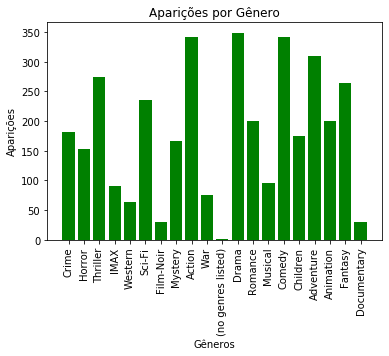

In [53]:
plt.bar(generos, aparicoes, color="green")
plt.title("Aparições por Gênero")
plt.xlabel("Gêneros")
plt.ylabel("Aparições")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()